# Practice Final Exam

### Instructions

**NOTE:** Real final exam instructions will be nearly identical, so you can save time by reading them here. Any differences on the real final exam will be in bold.)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel$\rightarrow$Restart) and then run all cells (in the menubar, select Cell$\rightarrow$Run All).

Any `assert` statements are provided to check your answers. Unlike autograded sections in the homework, you may receive partial (or full) credit even if these code blocks fail, and you may not receive full credit even if they pass (e.g. if you hack them to pass). Problems without `assert` statements may have multiple correct solutions, and will be manually graded by instructors.

Make sure you fill in any place that says `YOUR CODE HERE`. Please also your name and official GT ID below.

In [1]:
NAME = ""
GTID = "" #e.g. gburdell0

## Logistical Notes and Instructions

Failure to follow these instructions may negatively impact your grade.

* **Accessing the Vocareum assignment after the timer expires or downloading the exam file without permission will be considered an honor code violation.** Vocareum logs record all access times and downloads.

* You have **180 minutes to complete the exam** (180 minutes on the Vocareum timer). If you encounter unexpected technical issues please notify instructors immediately to establish a contingency plan.

* If you have issues or questions please contact instructors via a **private Canvas message**. Do not use any other means of communication during the exam.

* Instructors will **not answer questions related to content** in order to ensure a fair experience for everyone. In the case of ambiguities, typos, or possible errors you will be asked to use your best judgement, so **please restrict questions to technical issues that hinder your ability to complete the exam.**

* You may use any online resources or your own notes on the exam. However, you may not communicate with any of your classmates regarding the exam at any point during the exam time window. **Inappropriate communication will be considered an honor code violation.**

* Code blocks containing `assert` statements should not cause errors if the solution is correct, but you may submit the notebook for partial credit even if they raise errors.

* There are 5 main problems, each with sub-problems, that are worth a total of 135 points. Students in the 4745 section will receive 10 bonus points on the exam, but their total score cannot exceed 100%.

* Submit your exam through Vocareum when you are finished. You may push the submit button up to 20 times, so if you are feeling anxious you can submit at multiple points in the exam. Naturally, only the last submission will be graded. Fortunately, your code will be **automatically submitted** after the timer ends, so do not worry even though you have not had a chance to click the SUBMIT button within the exam time window.

## 1: Data Loading and Preprocessing (15 pts)

In this exam you will work with a version of the Dow Chemical Process Dataset. The data is different from what you have seen before, but all columns/features have the same names and meanings. The data is stored in `impurity_dataset.xlsx`.

The code block below imports the necessary packages and the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('impurity_dataset.xlsx')

### 1a: Remove non-numeric values and index by date-time (5 pts)

Remove all non-numeric values and change the index to "Date". Store the resulting dataset as `df_clean`.

In [3]:
def is_real_and_finite(x): 
    if not np.isreal(x): 
        return 0 
    elif not np.isfinite(x): 
        return False 
    elif pd.isnull(x): 
        return False 
    else: 
        return True

numeric_map = df[df.columns[1:]].applymap(is_real_and_finite) 
real_rows = numeric_map.all(axis = 1).values 
df_clean = df[real_rows] 
df_clean = df_clean.set_index("Date") 

In [4]:
assert np.isclose(np.mean(df_clean.values), 201.95)

### 1b: Add new column classifying points (5 pts)

Creat a new column called **Impurity Class**. The class should have the following levels:

`y:Impurity > 5` : 4

`5 >= y:Impurity > 3` : 3

`3 >= y:Impurity > 2` : 2

`y:Impurity <= 2` : 1

For example, if the value of `y:Impurity` is 2.5 then the value of `Impurity Class` should be 2. If the value of `y:Impurity` is 2, then the value of `Impurity Class` should be 1.

Add the column to the `df_clean` dataframe.

In [5]:
y_class = [] 

for i, row in df_clean.iterrows(): 
    if row['y:Impurity'] > 5: 
        y_class.append(4) 
    elif row['y:Impurity'] > 3: 
        y_class.append(3) 
    elif row['y:Impurity'] > 2: 
        y_class.append(2) 
    elif row['y:Impurity'] <= 2: 
        y_class.append(1) 

df_clean['Impurity Class'] = y_class

In [6]:
assert np.isclose(df_clean['Impurity Class'].mean(), 2.60797)

### 1c: Set up numpy arrays for regression and classification (5 pts)

Set up a numpy array, `X`, that contains all of the features (columns starting with `x`). Set up two corresponding vectors: one for regression, called `y_regress` that contains `y:Impurity`, and a second for classification, called `y_class` that contains the values of `Impurity Class`.

In [7]:
X_cols = [c for c in df_clean.columns if c.startswith('x')]  
 
X = df_clean[X_cols].values.astype('float') 
y_regress = df_clean['y:Impurity'].values 
y_class = df_clean['Impurity Class'].values 

In [8]:
assert np.isclose(np.mean((y_regress@X) / (y_class@X)), 1.274746)

## 2: Dimensional Reduction (35 pts)

In the problem you will compare multiple techniques for unsupervised and supervised dimensional reduction. The output of each problem should be a scatter plot or scatter plots showing the reduced dimensional space. 

The code block below will load the results of the previous problem in case you are unable to complete it. The code also shows one possible strategy for generating a scatter plot that uses the first two columns of the data as features, and uses the classification label to color-code the points. Transparency is used to convey data density. You may use this style for scatter plots, or make any modifications you would like.

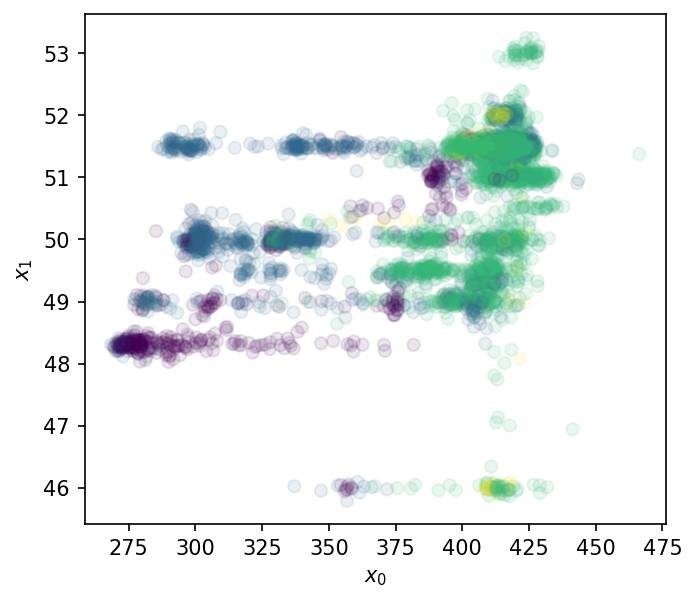

In [9]:
# The following code will read in X, y_regress and y_class in case you were unable to extract them in problem 1.

with open("numpy_data.npy", 'rb') as f:
    X = np.load(f)
    y_regress = np.load(f)
    y_class = np.load(f)
    
# The following code is an example of how to create a scatter plot with 2 dimensions of the data.
    
fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)

ax.scatter(X[:,0], X[:,1], c=y_class, alpha = 0.1)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$');

### 2a: Principal Component Analysis (15 pts)

Create a scatter plot using the first two principle components of the dataset with color defined by the impurity class. Store the reduced dimnsional data in an array named `X_PCA`, which should have 2 columns. Report the proportion of variance explained by the first 2 principle components and store it in the `var_explained` variable.

**For full credit, you should only use basic `numpy` functions and linear algebra operations.** Partial credit will be awarded if `scikit-learn` is used. The assertion statement will check the `X_PCA` data, but note that this may vary slightly depending on which strategy you use, so it is possible that a correct answer may not pass the assertion test.

In [10]:
X_scaled = (X - X.mean(axis=0)) 
cov = X_scaled.T @ X_scaled #could also use np.cov(X) 
eigvals, eigvecs = np.linalg.eig(cov) 
eigvecs = eigvecs.T 
projector = eigvecs[:2, :].T 
X_PCA = X @ projector 
 
var_explained = sum(eigvals[:2])/sum(eigvals) 
 
#sklearn alternative 
 
#from sklearn.decomposition import PCA 
 
#model = PCA(n_components=2, svd_solver='full') 
#X_PCA = model.fit_transform(X) 

print("Proportion of variance explained: {}".format(var_explained))

Proportion of variance explained: 0.8790264555890706


In [11]:
assert np.isclose(np.std(X_PCA-X_PCA.mean(axis=0)), 153.2282)
assert np.isclose(var_explained, 0.8790264555890708)

### 2b: LDA vs. PLS (15 pts)

Use the largest components from linear discriminant analysis (LDA) and partial least squares (PLS) analysis to obtain two-dimensional representations of the data. Report the following quantities:

1) The accuracy of the LDA model `LDA_acc` for classification using `y_class`

2) A scatter plot using the first 2 LDA components, color-coded by `y_class`

3) The $\mathrm{r^2}$ score of the PLS model `PLS_r2` for regression using `y_regress`

4) A scatter plot using the first 2 PLS components, color-coded by `y_regress`

You may use the `scikit-learn` implementations of LDA and PLS for this problem. Since these models are linear and parametric, you may assume that overfitting will not be a significant issue, so you do not need to use any cross-validation techniques.

LDA Accuracy: 0.8339802399435426
PLS R^2: 0.3566751803842034


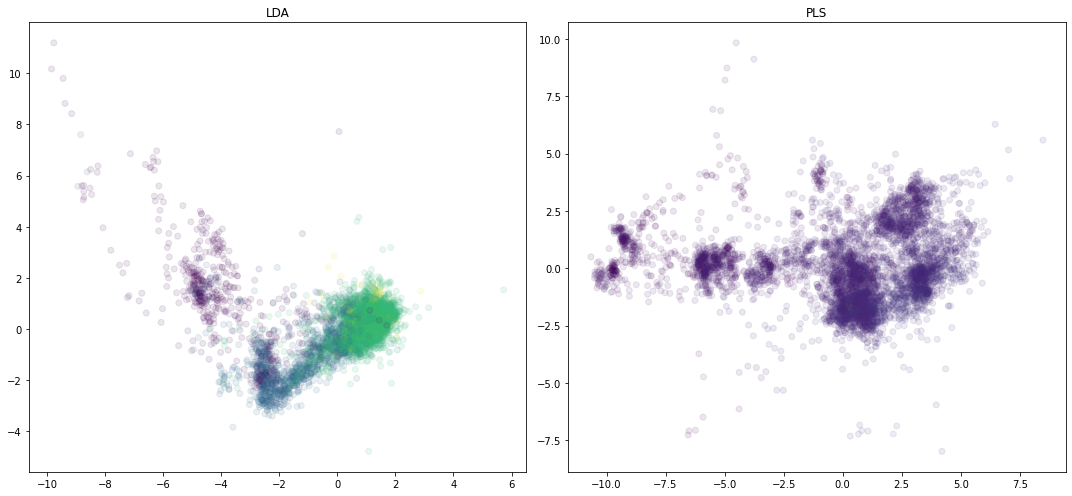

In [12]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2)
LDA.fit(X, y_class) 
X_LDA = LDA.transform(X) 
LDA_acc = LDA.score(X, y_class) 
 
print('LDA Accuracy: {}'.format(LDA_acc))

PLS = PLSRegression(n_components=2) 
PLS.fit(X, y_regress) 
X_PLS = PLS.transform(X) 
PLS_r2 =  PLS.score(X, y_regress) 
 
print('PLS R^2: {}'.format(PLS_r2))

fig, axes = plt.subplots(1,2, figsize=(15,7)) 
axes[0].scatter(X_LDA[:,0], X_LDA[:,1], c=y_class, alpha = 0.1)
axes[0].set_title('LDA')

axes[1].scatter(X_PLS[:,0], X_PLS[:,1], c=y_regress, alpha = 0.1)
axes[1].set_title('PLS')

plt.tight_layout()

In [13]:
assert np.isclose(LDA_acc * PLS_r2, 0.297460053)

### 2c: Feature selection (5 pts)

You have been tasked with identifying two features for a regression model that will predict the impurity level. The metric of interest is the mean absolute error (MAE) of the impurity level. Would you recommend principal component analysis, linear discrimimant analysis, or partial least squares?

Justify your answer. You may use a conceptual written explanation and/or code to provide justification.

** YOUR ANSWER HERE **

PLS: this is a supervised dimensional reduction algorithm.

## 3: Clustering and Generative Models (30 pts)

In this problem you will work with the PCA data from **Problem 2**, and you will use Gaussian mixture models to cluster the data. You will then use the resulting model to generate synthetic data. The code block below will read in the result of the prior problem in case you are unable to complete it.

In [14]:
with open("PCA_data.npy", 'rb') as f:
    X_PCA = np.load(f)

### 3a: Gaussian mixture models and Silhouette score (15 pts)

Use the silhouette score to identify the optimum number of clusters in a Gaussian mixture model (GMM). You should check from 5-20 clusters, and use `covariance_type="full"`. Your model should use the 2 PCA features as inputs, and you should use **standard scaling** to rescale the data. You may use any `scikit-learn` implementations you need in this problem. Note that the random ***seed*** is fixed to make the output predictable. 

Store the optimum number of clusters as `n_opt`.

In [15]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
np.random.seed(5)

X_GMM = X_PCA 
X_GMM = (X_GMM - X_GMM.mean(axis=0)) / X_GMM.std(axis=0) 
possible_numbers = range(5, 21) 
scores = [] 
top_score = 0 

for n in possible_numbers: 
    GMM = GaussianMixture(n_components = n, covariance_type='full') 
    GMM.fit(X_GMM)
    y_GMM = GMM.predict(X_GMM)
    score = silhouette_score(X_GMM, y_GMM)
    if score > top_score:
        n_opt = n 
        top_score = score 
    scores.append(score)

print('Optimum number of clusters: {}'.format(n_opt))

Optimum number of clusters: 11


In [16]:
assert n_opt == 11

### 3b: Number of parameters in GMM (5 pts)

How many free parameters are optimized for a GMM with 10 clusters and 3 dimensions? You should briefly explain your answer, but rigorous math or code is not required.

** YOUR ANSWER HERE **

- If the symmetric **full** covariance matrices are used, there will be 6 parameters (3 diagonal elements and 3 off-diagonal elements) to be optimized for each Gaussian: 6 x 10 = 60
- 3 coordinates for the center of each Gaussian: 3 x 10 = 10
- 1 weights for each Gaussian: 1 x 10 = 10

Therefore, 100 parameters would be optimized.

***Note***
If we set the sum of weights to be 1, we lose one degree of freedom so the number of parameters would be 99 in this case.

### 3c: Generating synthetic data (10 pts)

Use the optimal number of clusters to train a GMM model, then use the resulting model to generate 10,000 new synthetic data points. Create a scatter plot comparing the original data with the synthetic data. The scatter plot should have the **standard-scaled first two principal components as the x and y axes**.

Note: If you were unable to optimize the GMM model, you can assume that the optimum number of clusters is 12. However, note that this may not actually be the case.

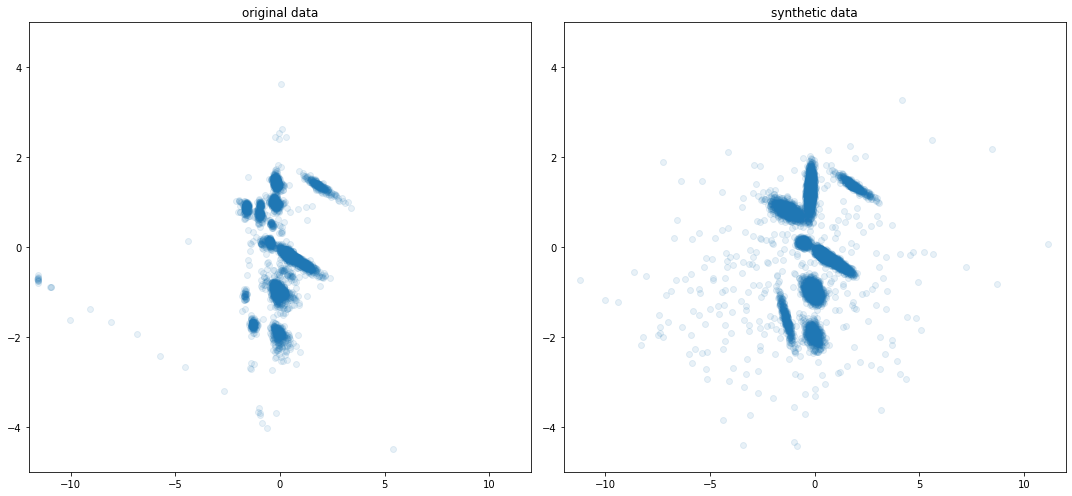

In [17]:
X_GMM = (X_PCA - X_PCA.mean(axis=0)) / X_PCA.std(axis=0) 
GMM = GaussianMixture(n_components = n_opt, covariance_type = 'full') 
GMM.fit(X_GMM) 
X_synthetic, y_synthetic = GMM.sample(10000) 
 
fig, axes = plt.subplots(1,2, figsize=(15,7)) 
axes[0].scatter(X_GMM[:,0], X_GMM[:,1], alpha = 0.1) 
axes[1].scatter(X_synthetic[:,0], X_synthetic[:,1], alpha = 0.1)

axes[0].set_xlim([-12, 12])
axes[0].set_ylim([-5, 5])
axes[0].set_title('original data')

axes[1].set_xlim([-12, 12])
axes[1].set_ylim([-5, 5])
axes[1].set_title('synthetic data')

plt.tight_layout()

## 4: Regression (35 pts)

In this problem you will create and compare several possible regression models for predicting the impurity concentration. The PCA-projected data can be loaded using the first block in **Problem 3**.

### 4a: Symbolic regression (15 pts)

A colleague has used `autofeat` to build a symbolic regression model and suggests that the impurity level can be approximated with the following formula:

$y_i = w_0 \frac{x_{i,11}}{x_{i,10}}  + w_1 \frac{x_{i,6}^3}{x_{i,12}} + w_2$

where $y_i$ is the impurity level at time point $i$, $x_{i,j}$ corresponds to $X[i, j]$ from the feature matrix, and $w_k$ are weights that need to be optimized.

Compute the mean absolute error using this symbolic model and compare it to the results of a multi-linear regression model that includes all 40 features. Store the MAE for symbolic regression as `MAE_symb` and the MAE for multi-linear regression as `MAE_linear`. Be sure to include an intercept term in both models. For simplicity, you can train and evaluate both models on the entire dataset, though in practice using a validation set to assess the model would be recommended.

**For full credit this should be done using only basic linear algebra operations in `numpy`**. Partial credit will be awarded if you use the `scikit-learn` implementation. You do not need to worry about cross-validation for this problem.

In [18]:
X_symb = np.ones((X.shape[0], 3)) 
X_symb[:, 0] = X[:, 11] / X[:,10] 
X_symb[:, 1] = X[:, 6]**3 / X[:,12] 
 
A_symb = X_symb.T@X_symb 
b_symb = X_symb.T@y_regress 
 
w_symb = np.linalg.solve(A_symb, b_symb) 
 
yhat_symb = X_symb@w_symb
 
MAE_symb = np.mean(np.abs(yhat_symb - y_regress)) 
 
X_linear = np.hstack((X, np.ones((X.shape[0], 1)))) 
 
A = X_linear.T@X_linear 
b = X_linear.T@y_regress 
 
w = np.linalg.solve(A, b) 
yhat = X_linear@w 
MAE_linear = np.mean(np.abs(yhat - y_regress))

In [19]:
assert(np.isclose(MAE_symb + MAE_linear, 0.97511))

### 4b: KRR hyperparameter tuning (15 pts)

In this problem you will construct and optimize a kernel ridge regression model with a radial basis function kernel. You should use **all features** of the dataset as an input to the KRR model. You should use **standard scaling** to re-scale the dataset. Then, use hold-out to randomly select 50% of the data as a validation set. Finally, use 3-fold cross validation with the remaining train/test data to optimize a kernel ridge regression model. You should search over the following ranges of hyperparameters:

$\gamma \in$ [1e-4, 5e-4, 1e-3]

$\alpha \in$ [0.05, 0.1, 0.5]

Report the following quantities:

* optimum alpha (`alpha_opt`)
* optimum gamma (`gamma_opt`)
* MAE for the validation set (`MAE_val`)

You may use any built-in `scikit-learn` functions you want for this problem.

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.kernel_ridge import KernelRidge

X_train, X_val, y_train, y_val = train_test_split(X, y_regress, test_size = 0.5) 
 
gammas = [1e-4, 5e-4, 1e-3] 
 
alphas = np.array([0.05, 0.1, 0.5]) 
 
parameter_ranges = {'alpha':alphas, 'gamma':gammas} 
 
KRR = KernelRidge(kernel='rbf') 
 
KRR_search = GridSearchCV(KRR, parameter_ranges, cv=3) 
KRR_search.fit(X_train,y_train) 
alpha_opt = KRR_search.best_estimator_.alpha 
gamma_opt = KRR_search.best_estimator_.gamma 
yhat_val = KRR_search.best_estimator_.predict(X_val) 
MAE_val = np.mean(np.abs(yhat_val - y_val))

print("Optimal alpha: {}, Optimal gamma: {}".format(alpha_opt, gamma_opt))
print("r2 score on the validation set: {}".format(MAE_val))

Optimal alpha: 0.5, Optimal gamma: 0.0001
r2 score on the validation set: 0.3547381778600389


### 4c: Parametric vs. non-parametric (5 pts)

Identify each of the models used in this problem as parametric or non-parametric. The models you should identify as parametric/non-parametric are:

* Symbolic regression model from 4a
* Multi-linear regression model from 4a
* Kernel ridge regression model from 4b

For each model, simply write "parametric" or "non-parametric".

** YOUR ANSWER HERE **

- Symbolic regression: non-parametric
- Multi-linear regression: parametric
- Kernel rdige regression: non-parametric

## 5: Time Series Analysis (20 pts)

### 5a: Data visualization (10 pts)

Create a version of the dataset that has only one column: `y:Impurity`. There should be no missing or non-numeric values. You may use the `df_clean` dataframe from **Problem 1**, or generate the dataframe directly from `impurity_data.xlsx`.

Plot the original data and smoothed versions of the dataset with window sizes of 10, 100, and 1000. You may plot them all on a single figure, or use multiple plots depending on your preference.

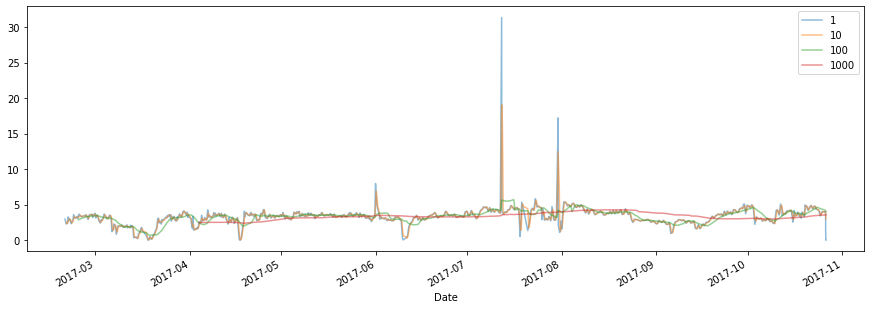

In [21]:
df_timeseries = df_clean[['y:Impurity']]
 
fig, ax = plt.subplots(figsize=(15,5)) 
 
for window in [1, 10, 100, 1000]: 
    rolling_df = df_timeseries['y:Impurity'].rolling(window) 
    moving_avg = rolling_df.mean() 
    moving_avg.plot(ax = ax, alpha = 0.5, label = str(window)) 
     
ax.legend();

### 5b: Stationarity (5 pts)

Use the Dickey-Fuller test to determine the **probability that the data is stationary** (`p_stat`).

In [22]:
from statsmodels.tsa.stattools import adfuller 
 
dataset = df_timeseries['y:Impurity'] 
 
p_stat = 1 - adfuller(dataset)[1] 
print("Probability the data is stationary: {}".format(p_stat))

Probability the data is stationary: 0.9999999999997162


In [23]:
assert np.isclose(p_stat, 0.9999999999997162)

### 5c: Autocorrelation and partial autocorrelation (5 pts)

Plot the autocorrelation and partial autocorrelation for the dataset out to 20 lags.

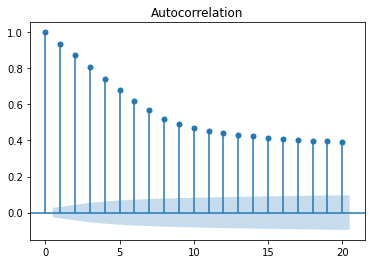

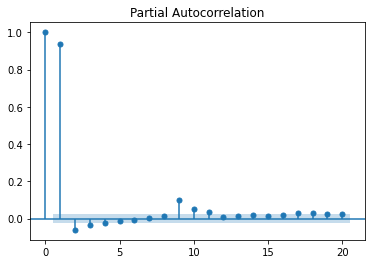

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
 
_ = plot_acf(dataset, lags = 20) 
_ = plot_pacf(dataset, lags = 20)

End of assignment. Any code appearing past this point will not be graded.